<Axes: xlabel='feat1', ylabel='feat2'>

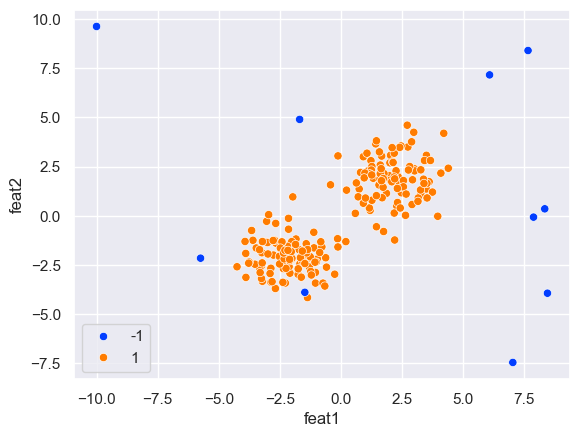

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

sns.set()
np.random.seed(123)
num_anomaly = 10

# 平均と分散
mean1 = np.array([2, 2])
mean2 = np.array([-2, -2])
cov = np.array([[1, 0], [0, 1]])

# 正常データの生成(2つの正規分布から生成)
norm1 = np.random.multivariate_normal(mean1, cov, size=100)
norm2 = np.random.multivariate_normal(mean2, cov, size=100)

# 異常データの生成(一様分布から生成)
lower, upper = -10, 10
anom = (upper - lower)*np.random.rand(num_anomaly, 2) + lower

df = np.vstack([norm1, norm2, anom])
df = pd.DataFrame(df, columns=["feat1", "feat2"])

df_label = np.array([1]*200 + [-1]*num_anomaly)

# データセットの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.3, random_state=123)

# 可視化
sns.scatterplot(x="feat1", y="feat2", data=df, hue=df_label, palette="bright")


0.9476190476190476

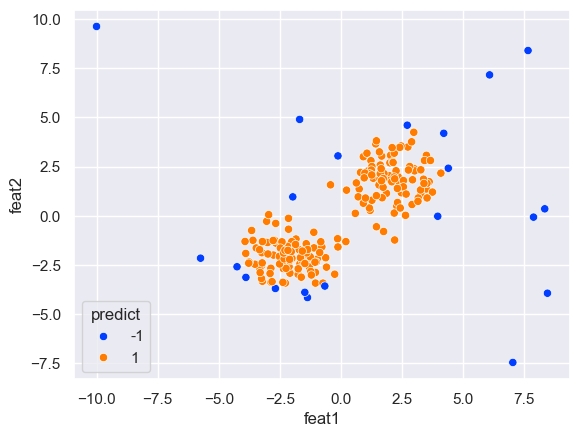

In [9]:
# sklearnでの実装
from sklearn.ensemble import IsolationForest
sk_df = df.copy()

clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=123)
clf.fit(sk_df)
sk_df["predict"] = clf.predict(sk_df)

# 可視化
sns.scatterplot(x="feat1", y="feat2", data=sk_df, hue='predict', palette='bright')

# 正解率
accuracy_score(df_label, sk_df["predict"])

0.7476190476190476

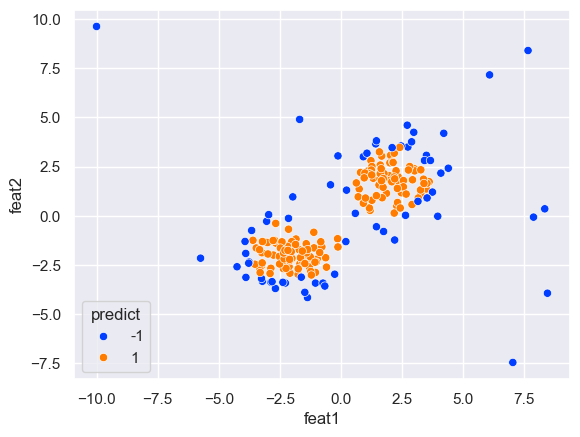

In [10]:
# contaminationを変更
clf = IsolationForest(n_estimators=100, contamination=0.3, random_state=123)
clf.fit(sk_df)
sk_df["predict"] = clf.predict(sk_df)

# 可視化
sns.scatterplot(x="feat1", y="feat2", data=sk_df, hue='predict', palette='bright')

# 正解率
accuracy_score(df_label, sk_df["predict"])

0.9380952380952381

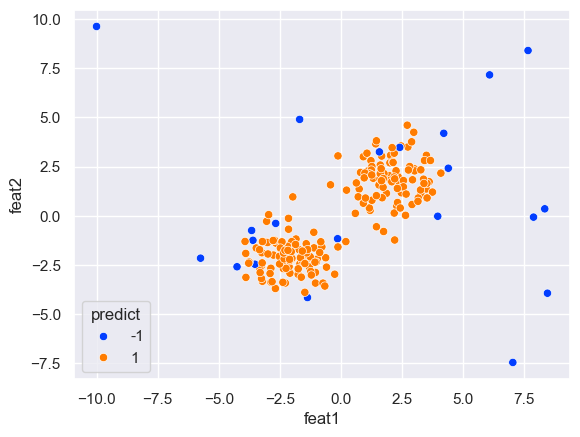

In [11]:
# random_stateを変更
clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=1)
clf.fit(sk_df)
sk_df["predict"] = clf.predict(sk_df)

# 可視化
sns.scatterplot(x="feat1", y="feat2", data=sk_df, hue='predict', palette='bright')

# 正解率
accuracy_score(df_label, sk_df["predict"])
plt.xlim(-10, 10)
plt.ylim(-10, 10)

0.9380952380952381

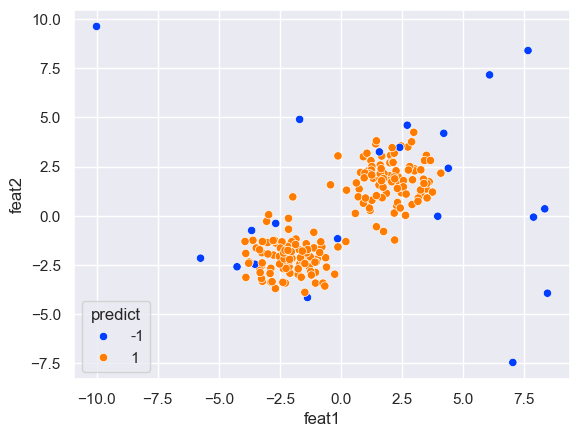

In [12]:
# n_estimatorsを変更（100 → 1000）
clf = IsolationForest(n_estimators=1000, contamination=0.1, random_state=123)
clf.fit(sk_df)
sk_df["predict"] = clf.predict(sk_df)

# 可視化
sns.scatterplot(x="feat1", y="feat2", data=sk_df, hue='predict', palette='bright')

# 正解率
accuracy_score(df_label, sk_df["predict"])
plt.xlim(-10, 10)
plt.ylim(-10, 10)

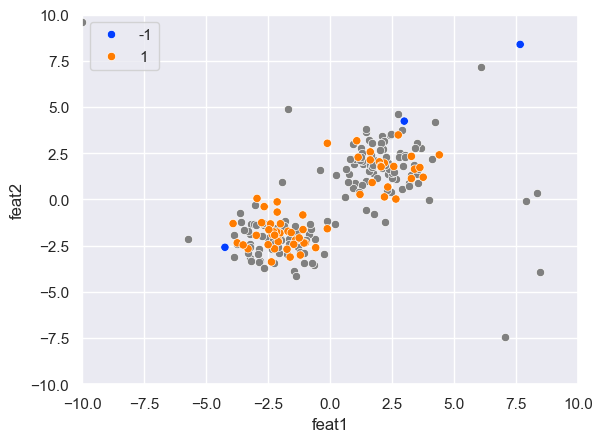

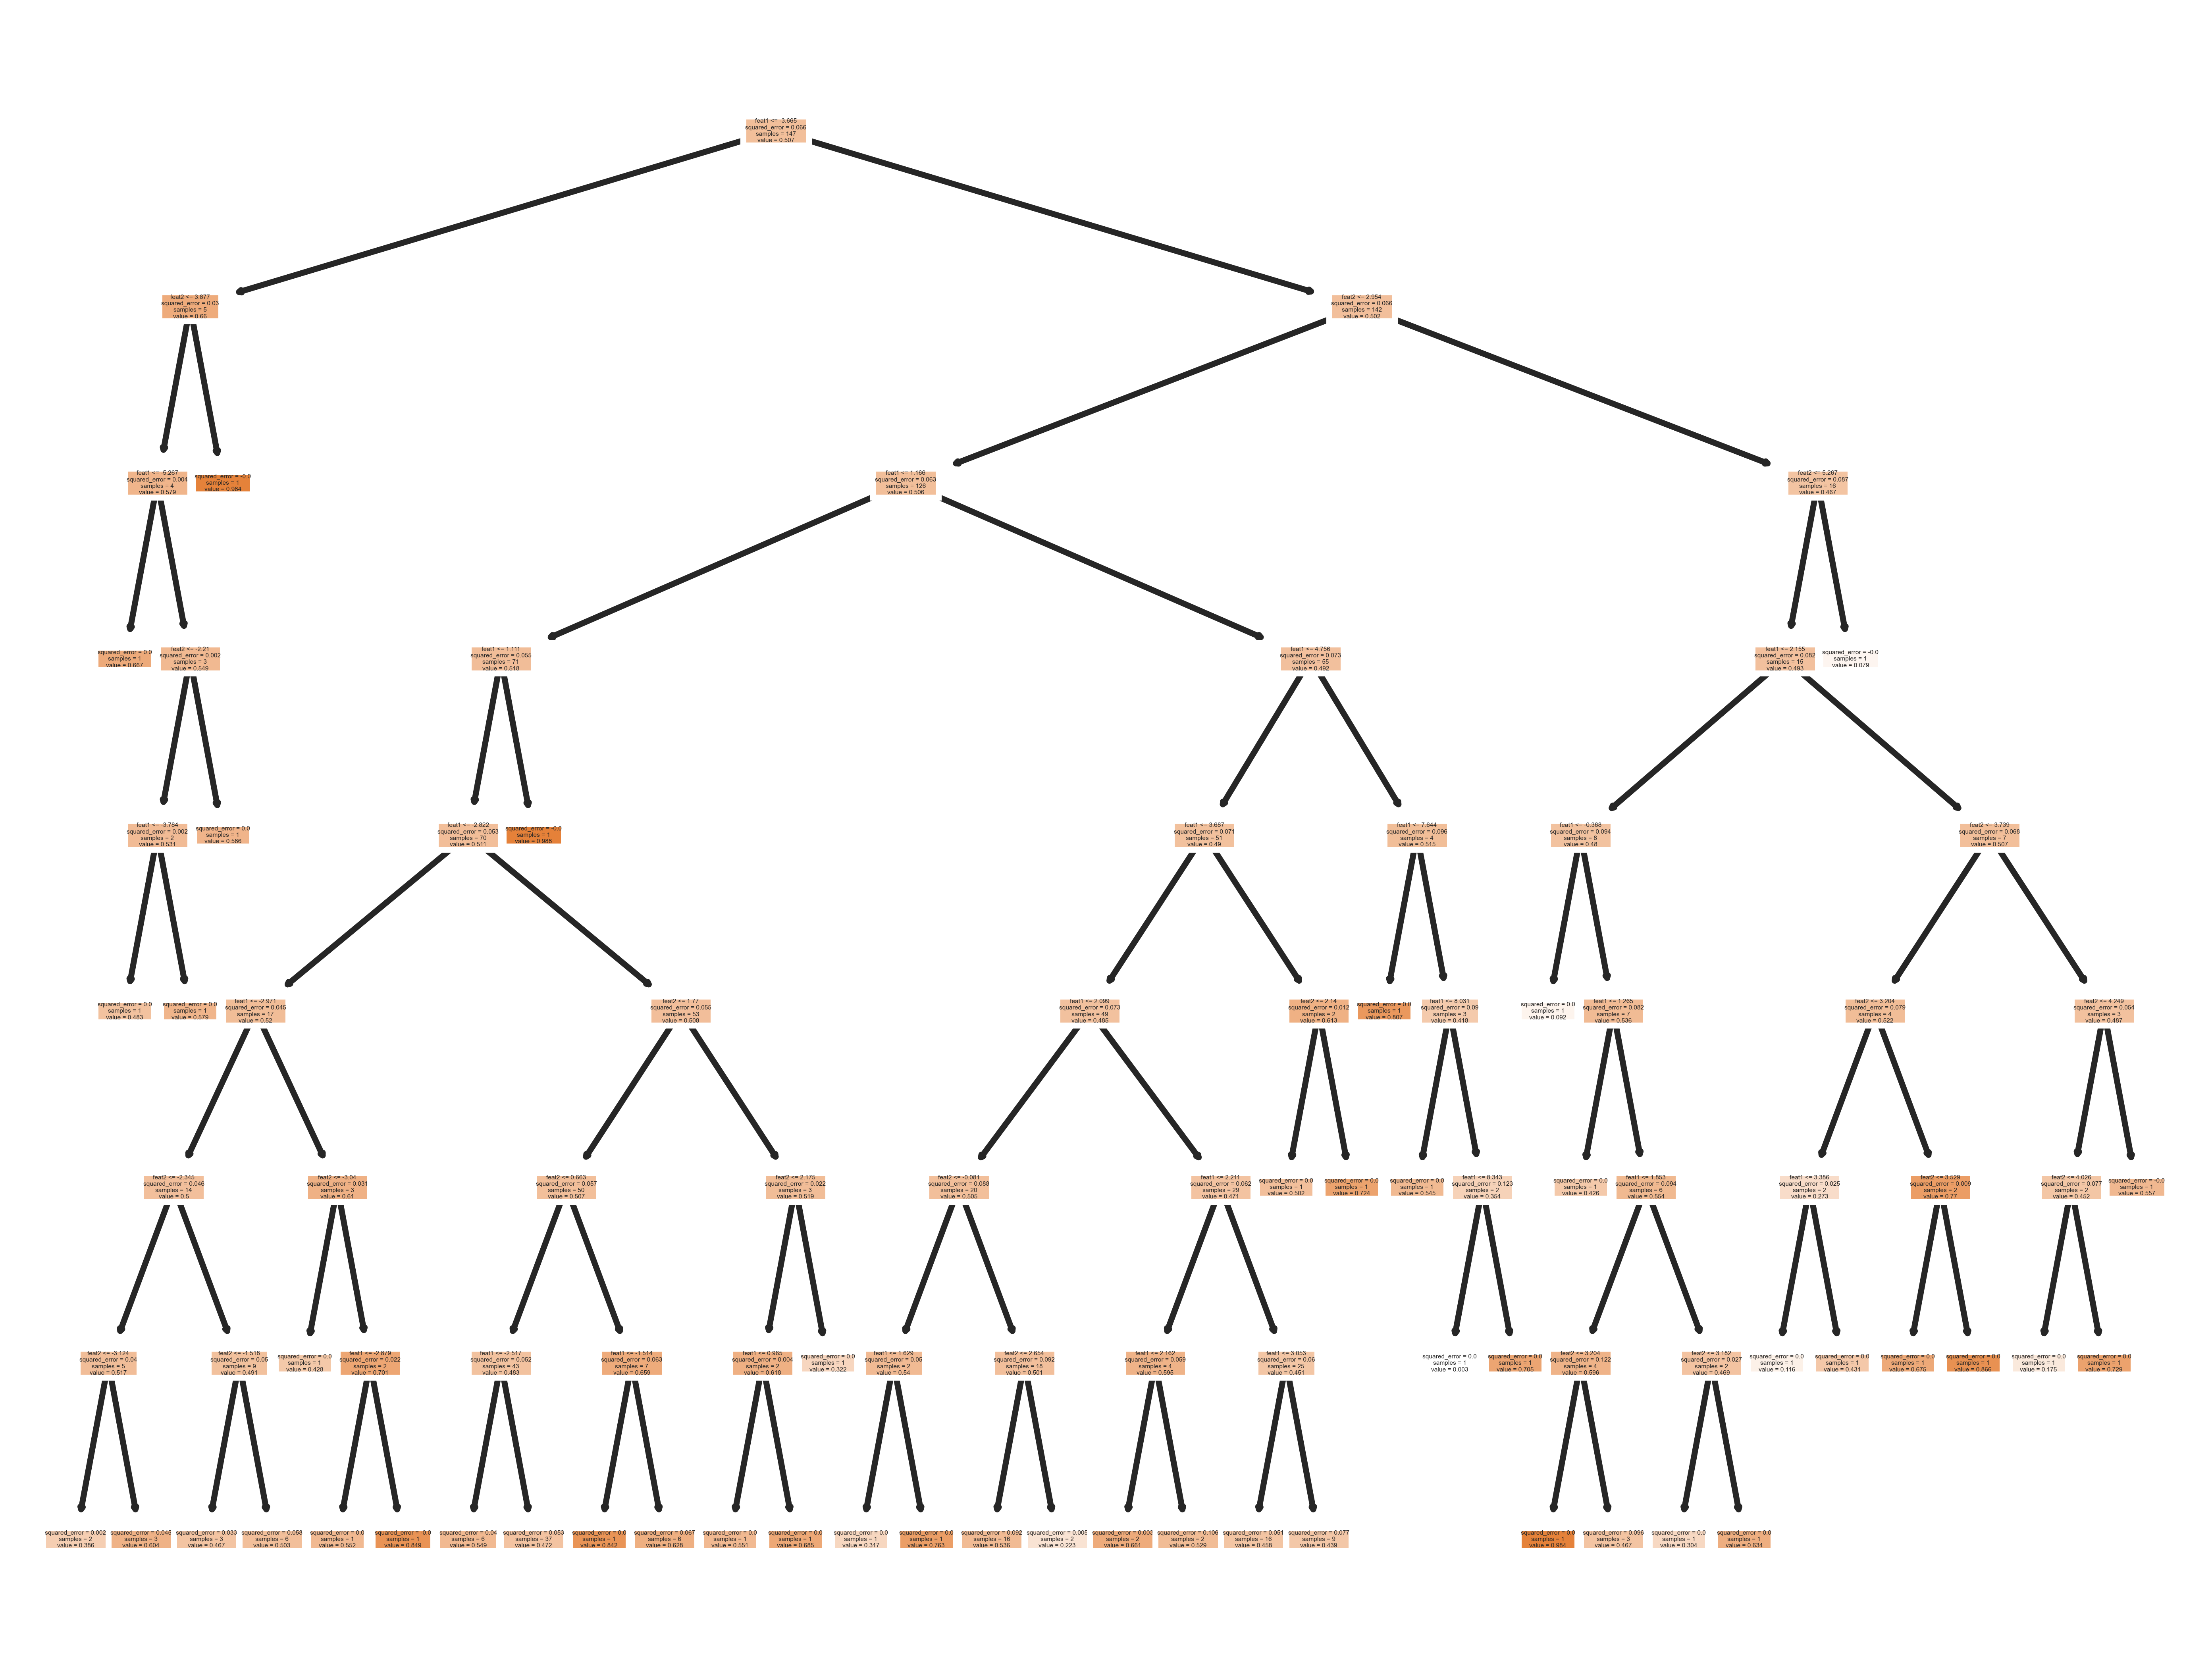

In [57]:
# contaminationについて実験

clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=123)
clf.fit(X_train)
y_pred = clf.predict(X_test)

# 可視化
sns.scatterplot(x="feat1", y="feat2", data=X_train, color='gray')  # sk_dfをプロット
sns.scatterplot(x="feat1", y="feat2", data=X_test, hue=y_pred, palette='bright')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# 最初の決定木を取得
from sklearn import tree
estimator = clf.estimators_[0]

plt.figure(dpi=1080)  # グラフのサイズを設定
tree.plot_tree(estimator, filled=True, feature_names=["feat1", "feat2"], class_names=["0", "1"])
plt.show()

In [60]:
def plot_tree_partitions(tree, node_id=0, x_min=-10, x_max=10, y_min=-10, y_max=10):
    if tree.children_left[node_id] == tree.children_right[node_id]:  # leaf node
        return

    split_feature = tree.feature[node_id]
    split_threshold = tree.threshold[node_id]

    if split_feature == 0:  # feat1で分割
        plt.plot([split_threshold, split_threshold], [y_min, y_max], color='r', linestyle='-')
        plot_tree_partitions(tree, tree.children_left[node_id], x_min, split_threshold, y_min, y_max)
        plot_tree_partitions(tree, tree.children_right[node_id], split_threshold, x_max, y_min, y_max)
    else:  # feat2で分割
        plt.plot([x_min, x_max], [split_threshold, split_threshold], color='r', linestyle='-')
        plot_tree_partitions(tree, tree.children_left[node_id], x_min, x_max, y_min, split_threshold)
        plot_tree_partitions(tree, tree.children_right[node_id], x_min, x_max, split_threshold, y_max)

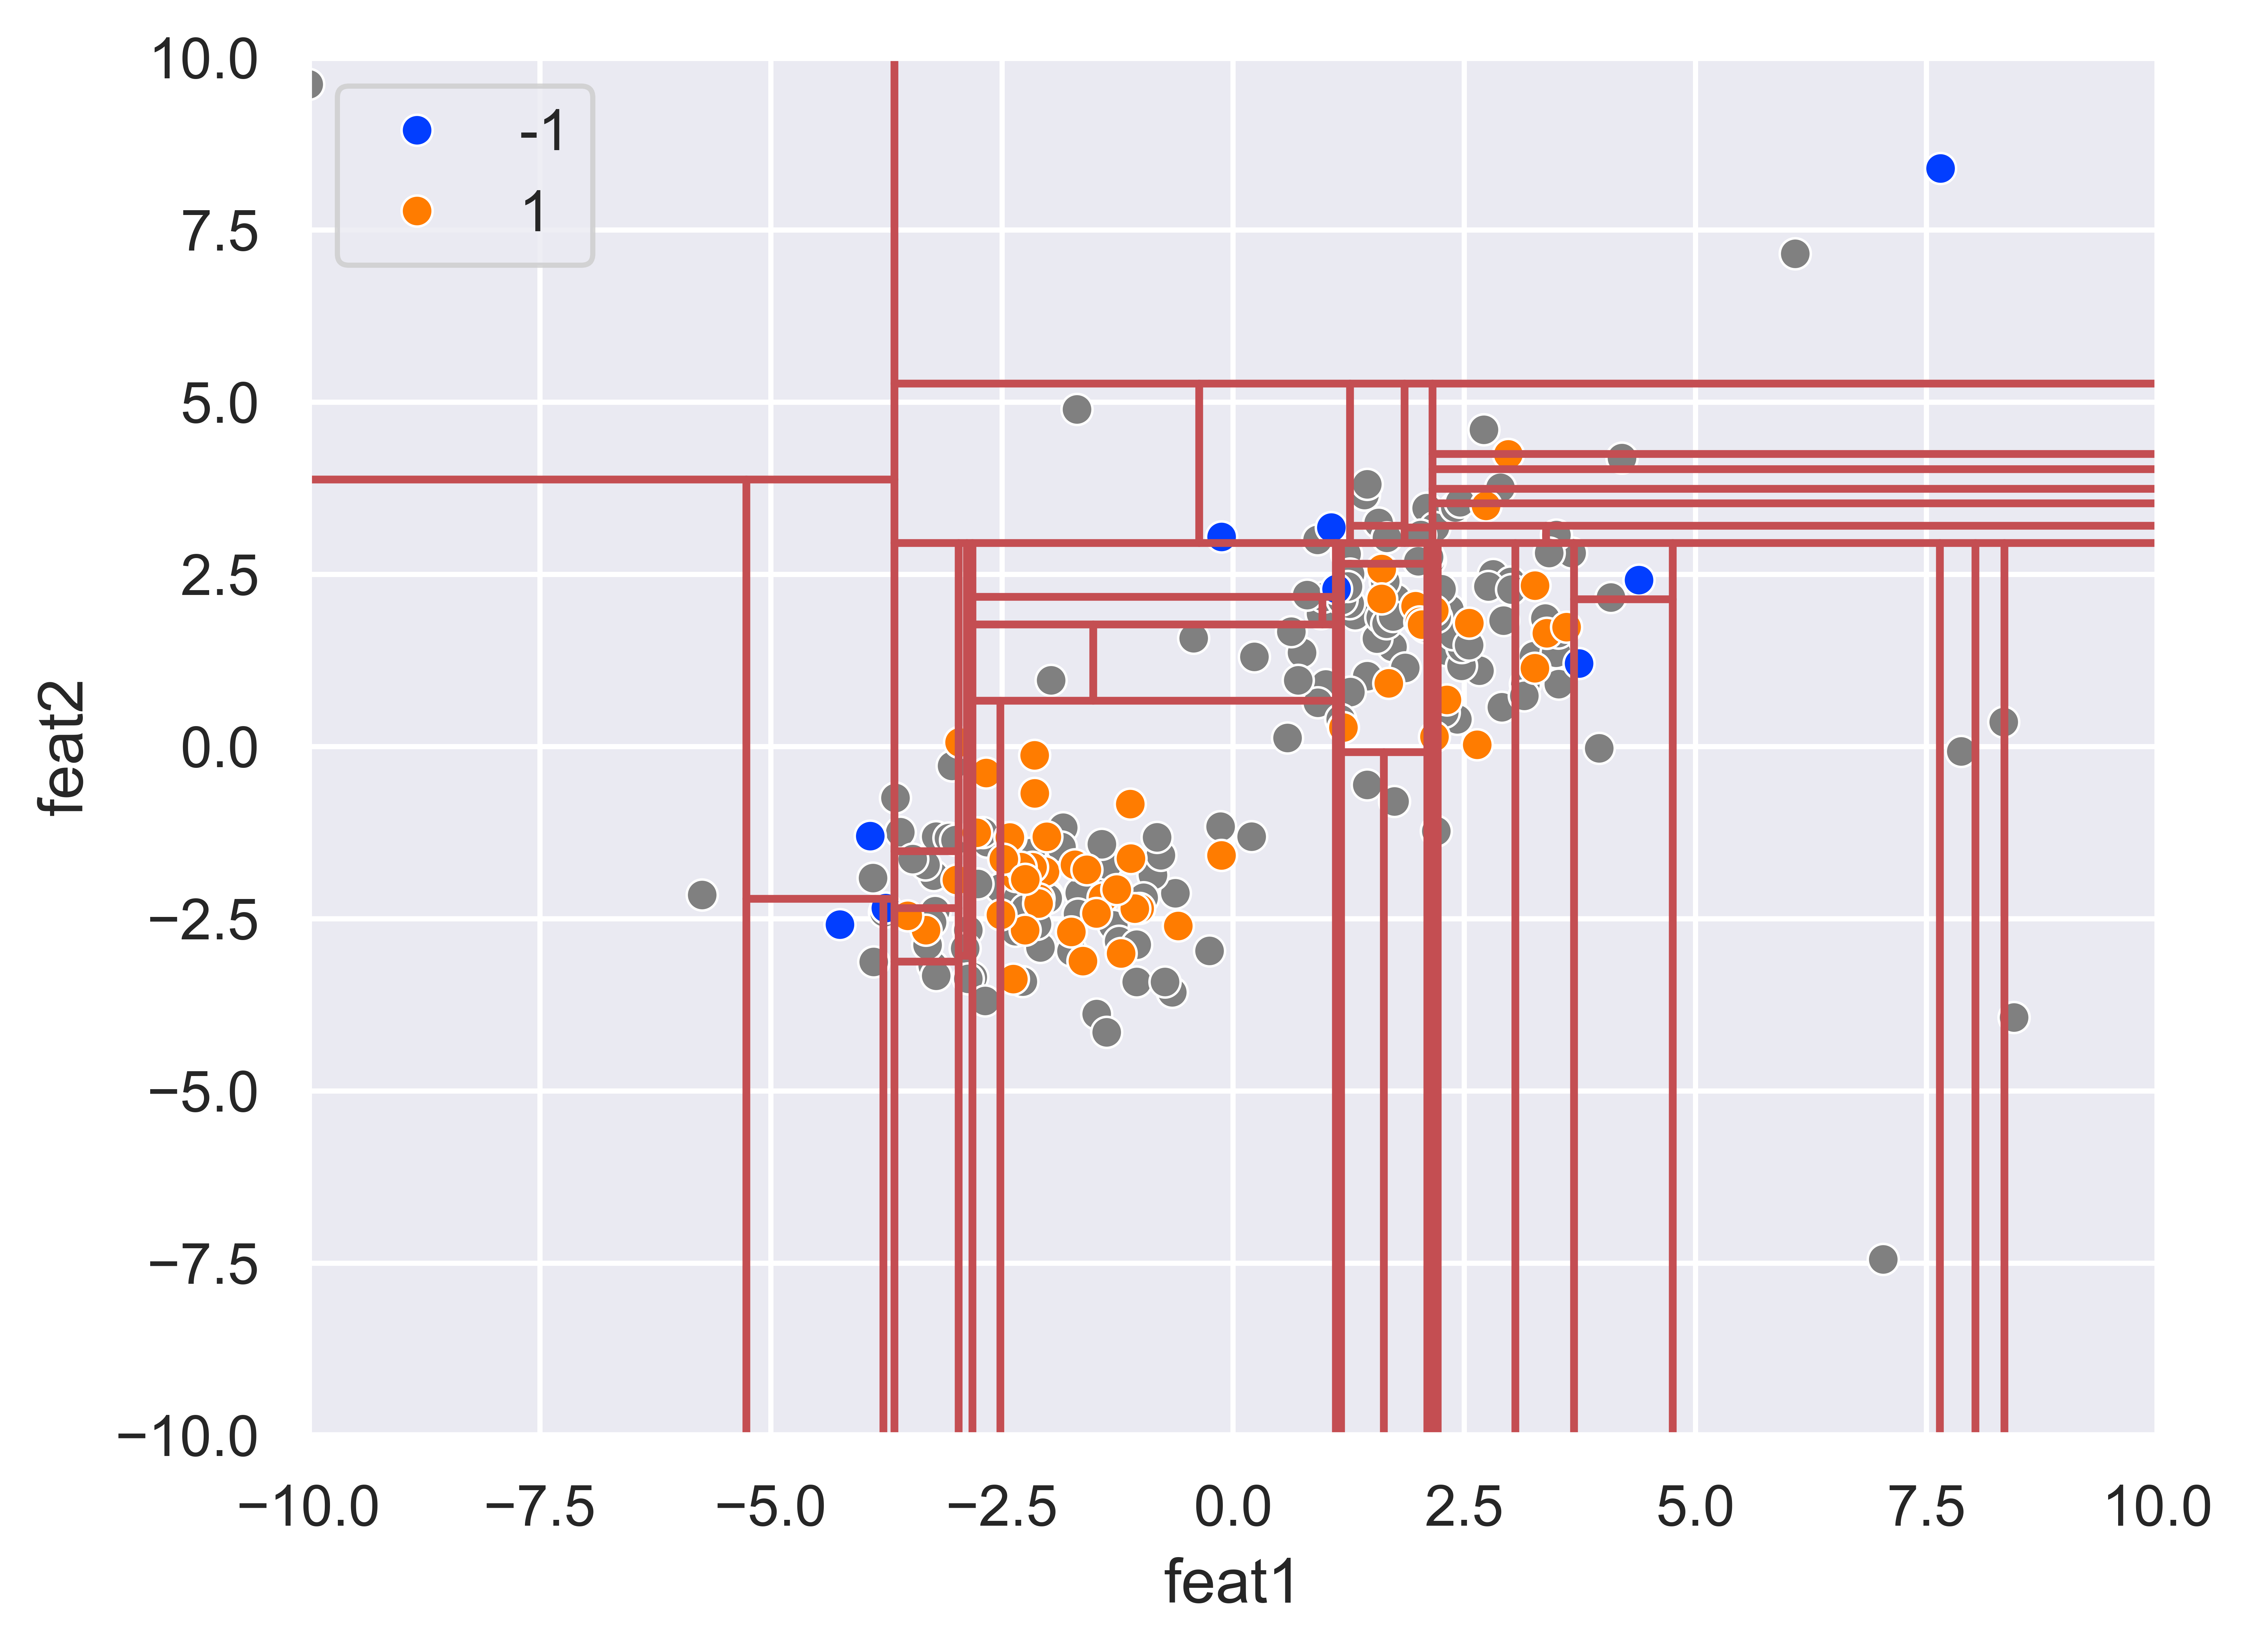

In [66]:
# contaminationについて実験
clf = IsolationForest(n_estimators=1, contamination=0.1, random_state=123)
clf.fit(X_train)
y_pred = clf.predict(X_test)

# 可視化
plt.figure(dpi=1080)  # グラフのサイズを設定
sns.scatterplot(x="feat1", y="feat2", data=X_train, color='gray')  # sk_dfをプロット
sns.scatterplot(x="feat1", y="feat2", data=X_test, hue=y_pred, palette='bright')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# 最初の決定木を取得
from sklearn import tree
estimator = clf.estimators_[0]

# 分割をグラフに反映
plot_tree_partitions(estimator.tree_)

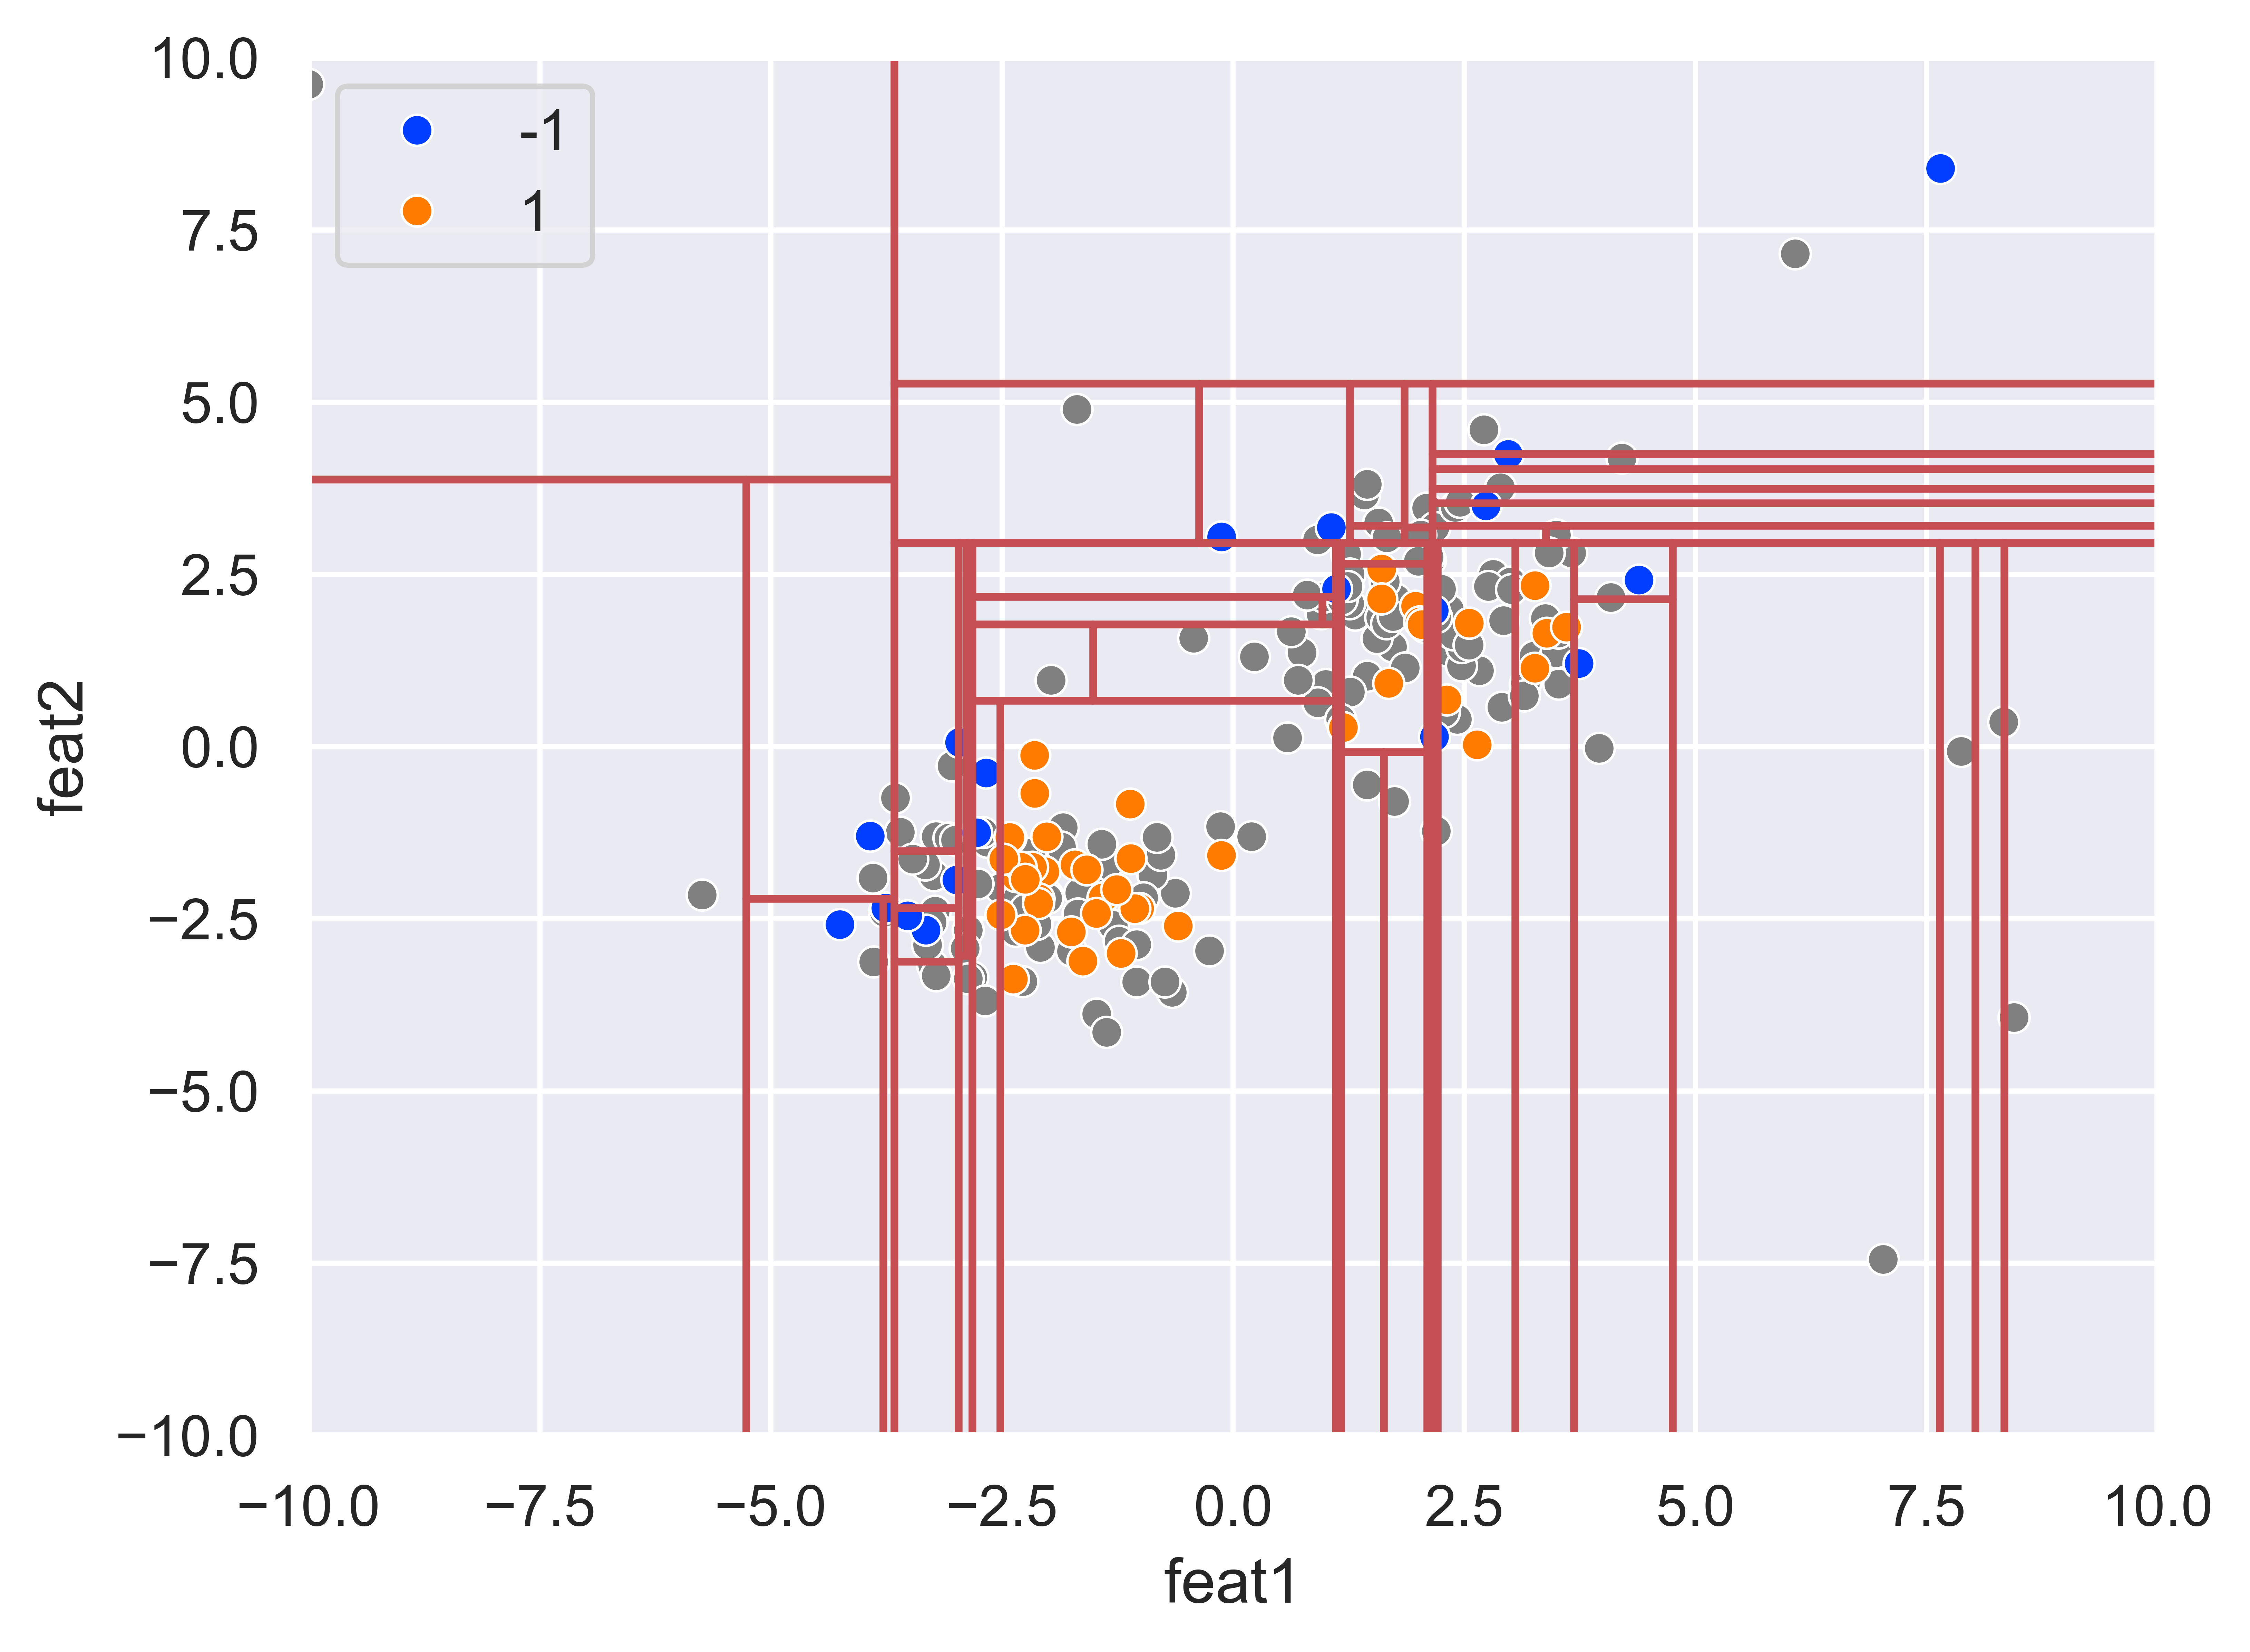

In [65]:
# contaminationについて実験
clf = IsolationForest(n_estimators=1, contamination=0.5, random_state=123)
clf.fit(X_train)
y_pred = clf.predict(X_test)

# 可視化
plt.figure(dpi=1080)  # グラフのサイズを設定
sns.scatterplot(x="feat1", y="feat2", data=X_train, color='gray')  # sk_dfをプロット
sns.scatterplot(x="feat1", y="feat2", data=X_test, hue=y_pred, palette='bright')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# 最初の決定木を取得
from sklearn import tree
estimator = clf.estimators_[0]

# 分割をグラフに反映
plot_tree_partitions(estimator.tree_)

contamination ratioについて
contamination ratio =「トレーニングデータにおける異常データの割合」
（テストデータにおける異常データの割合だと思っていた）
異常の判定は以下のとおり
1. 各データポイントの異常スコアを上の分割に基づいて計算する
2. トレーニングデータの異常スコア群の中にその異常スコアを入れて、contamination ratioに基づいて異常かどうかを決定する

気持ち
* CRが低い時に精度が高くなって欲しい
* anomalyの判定器は信用できるのか？　→0day攻撃を検知できることが異常検知アルゴリズムを採用するメリットであって、この時anomaly検知器の意義はあるのか